# Ensemble Learning with Boosting — Exercise Lab (using breast cancer data)

### Objective
Implement and evaluate AdaBoost and Gradient Boosting algorithms on the breast cancer dataset, compare their performance to a baseline classifier, and explore hyperparameter effects.

### Part 1: Setup

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Part 2: Load and Explore Data

In [4]:
from sklearn.datasets import load_breast_cancer

# Load dataset
breast = load_breast_cancer()
X = breast.data
y = breast.target

# Create DataFrame for visualization
df = pd.DataFrame(X, columns=breast.feature_names)
df['target'] = pd.Categorical.from_codes(y, breast.target_names)

# Visualize pairplot (optional, high-dimensional, so focus on top features)
# sns.pairplot(df[['mean radius', mean texture', 'mean smoothness', 'target']], hue='target')
# plt.show()

Note: The breast cancer dataset has many features; visualizations of full feature space are limited, but you can explore a subset as above.

### Part 3: Split Data

In [5]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 455
Testing samples: 114


### Part 4: Baseline Classifier (Decision Tree)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")


Decision Tree Accuracy: 0.95


### Part 5: Implement Boosting Algorithms
##### 1. AdaBoost

In [8]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada):.2f}")


AdaBoost Accuracy: 0.97


##### 2. Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.2f}")


Gradient Boosting Accuracy: 0.96


### Part 6: Compare Results Visually

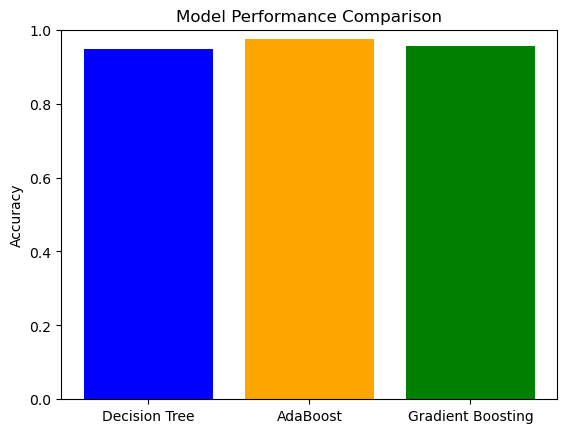

In [10]:
import matplotlib.pyplot as plt

models = ['Decision Tree', 'AdaBoost', 'Gradient Boosting']
scores = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_ada),
    accuracy_score(y_test, y_pred_gb)
]

plt.bar(models, scores, color=['blue', 'orange', 'green'])
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Performance Comparison')
plt.show()


### Part 7: Challenge Questions

1- Vary n_estimators in AdaBoost and Gradient Boosting. How does accuracy change?
2- Implement and evaluate a Random Forest classifier and include it in the comparison.
3- Plot feature importances from Gradient Boosting; which features are most influential?


### Summary

This exercise helps you understand boosting algorithms' strengths, how to implement them with scikit-learn, and how to interpret their results on a dataset with real-world relevance.